In [1]:
import numpy as np 
import math 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from grid import Grid
from solvers import ValueIteration
from toy import Toy

In [2]:
def analyze_policy(env, policy):
    severities = [i for i in range(env.terminal_sev)]
    actions, action_names = env.actions, env.action_names
    action_data = {f"{action_name}": np.zeros(len(severities)) for action_name in action_names}

    # bar chart
    for state, action in policy.items(): 
        if state not in env.goal_states and state not in env.terminal_states: 
            env_state, sev_lvl = state
            sev_idx = severities.index(sev_lvl) 
            act_name = action_names[action]
            action_data[act_name][sev_idx] += 1

    print(action_data)


# bar plot of policy
def plot_policy_bar(env, policy):
    env_states = []
    sevs = []
    for state in env.states: 
        env_state, sev = state 
        if env_state not in env_states: 
            env_states.append(env_state)
        if sev not in sevs: 
            sevs.append(sev)

    colors = ['g', 'y', 'c', 'b', 'r']
    yticks = sevs 
    xticks = env_states

    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Environmental state')
    ax.set_ylabel('Severity')
    ax.set_zlabel('Action')
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)
    ax.set_zticks([0,1])

    data = {action: [] for action in env.actions}
    for state, action in policy.items():
        if state in policy and state not in env.goal_states and state not in env.terminal_states:  
            data[action].append(state)

    handles, labels = [], []

    for action in env.actions: 
        states = data[action]
        if len(states) != 0:
            xs = [state[0] for state in states]
            ys = np.ones(len(xs))
            zs = [state[1] for state in states]
            cs = [colors[action]] * len(xs)

            ax.bar(xs, ys, zs, zdir='y', 
                color=cs, alpha=0.8, label=f"Action {action}")
        
    #ax.legend([f"Action {i}" for i in env.actions])
    ax.legend()
    plt.show()


# scatter plot of policy
def plot_policy_scatter(env, policy):
    env_states = []
    sevs = []
    for state in env.states: 
        env_state, sev = state 
        if env_state not in env_states: 
            env_states.append(env_state)
        if sev not in sevs: 
            sevs.append(sev)

    colors = ['g', 'y', 'c', 'b', 'r']
    yticks = sevs 
    xticks = env_states

    """
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Environmental state')
    ax.set_ylabel('Severity')
    #ax.set_zlabel('Action')
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)
    ax.set_zticks([])

    data = {action: [] for action in env.actions}
    for state, action in policy.items():
        if state in policy and state not in env.goal_states and state not in env.terminal_states:  
            data[action].append(state)

    handles, labels = [], []

    for action in env.actions: 
        states = data[action]
        if len(states) != 0:
            xs = [state[0] for state in states]
            zs = np.ones(len(xs))
            ys = [state[1] for state in states]
            cs = [colors[action]] * len(xs)

            ax.scatter(xs, ys, zs, c=cs, alpha=1, s=100, label=f"Action {action}")

        
    #ax.legend([f"Action {i}" for i in env.actions])
    ax.legend()
    plt.show()
    """

    xticks = sevs 
    yticks = env_states


    fig = plt.figure(figsize=(8,12))
    ax = fig.add_subplot(111)
    ax.set_ylabel('Environmental state')
    ax.set_xlabel('Severity')
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)

    data = {action: [] for action in env.actions}
    for state, action in policy.items(): 
        if state in policy and state not in env.goal_states and state not in env.terminal_states: 
            data[action].append(state)

    for action in env.actions: 
        states = data[action]
        if len(states) != 0: 
            xs = [state[1] for state in states]
            ys = [state[0] for state in states]
            cs = [colors[action]] * len(xs) 

            ax.scatter(xs, ys, c=cs, alpha=1, s=100, label=f"Action {action}")

    #ax.legend([f"Action {i}" for i in env.actions])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=True, ncol=5)
    #ax.legend()
    plt.show()




state:  (0, 0)
action:  0
nom success rate:  0.95
success rate:  0.95

state:  (0, 0)
action:  1
nom success rate:  0.9
success rate:  0.9

state:  (0, 0)
action:  2
nom success rate:  0.8
success rate:  0.8

state:  (0, 0)
action:  3
nom success rate:  0.6
success rate:  0.6

state:  (0, 0)
action:  4
nom success rate:  0.45
success rate:  0.45

state:  (0, 2)
action:  0
nom success rate:  0.95
success rate:  0.9310949999999999

state:  (0, 2)
action:  1
nom success rate:  0.9
success rate:  0.88209

state:  (0, 2)
action:  2
nom success rate:  0.8
success rate:  0.78408

state:  (0, 2)
action:  3
nom success rate:  0.6
success rate:  0.5880599999999999

state:  (0, 2)
action:  4
nom success rate:  0.45
success rate:  0.441045

state:  (0, 3)
action:  0
nom success rate:  0.95
success rate:  0.92178405

state:  (0, 3)
action:  1
nom success rate:  0.9
success rate:  0.8732691

state:  (0, 3)
action:  2
nom success rate:  0.8
success rate:  0.7762392

state:  (0, 3)
action:  3
nom suc

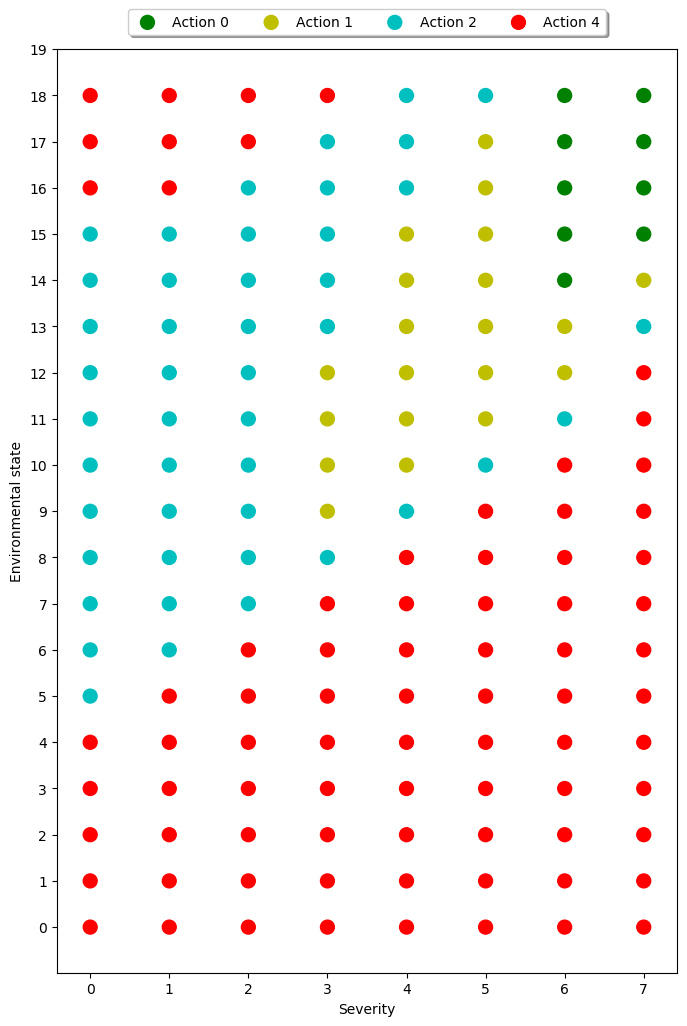

In [3]:
num_env_states = 20
sev_lvls = [1,2]
terminal_sev = 8
action_info = {
    "num_actions": 5,
    "costs": [10, 8, 6, 4, 2],
    "success_rates": [0.95, 0.9, 0.8, 0.6, 0.45],
    "sev_probs": [[0.9, 0.1], [0.8, 0.2], [0.7, 0.3], [0.5, 0.5], [0.3, 0.7]],
    "decline_rate": 0.99
}

"""
sev_lvls = [1,2]
terminal_sev = 8
action_info = {
    "num_actions": 3,
    "costs": [7, 3, 1],
    "success_rates": [0.8, 0.6, 0.45],
    "sev_probs": [[0.7, 0.3], [0.5, 0.5], [0.3, 0.7]],
    "decline_rate": 1
}
"""

r_goal = 100
r_terminal = -10


toy = Toy(num_env_states, sev_lvls, terminal_sev, action_info, r_goal, r_terminal) 
print(repr(toy))

vi = ValueIteration(toy)
V, Q, policy = vi.run()

analyze_policy(toy, policy)

print_policy = False
if print_policy:
    prev_state = (0,0)
    for (sidx, state) in enumerate(toy.states): 
        if state in policy and state not in toy.goal_states and state not in toy.terminal_states: 
            if state[0] != prev_state[0]:
                print("\n\n")
            print("\nState: ", state)
            action = policy[state]
            print("Action: ", toy.action_names[action])
            print("Q: ", Q[sidx])
            prev_state = state


# plot policy 

#plot_policy_bar(toy, policy)
plot_policy_scatter(toy, policy)